<a href="https://colab.research.google.com/github/Azeezmariam/air_quality_forecasting/blob/main/air_quality_forecasting_mariam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [73]:
# Load the dataset
train = pd.read_csv('/content/train.csv')
train['datetime'] = pd.to_datetime(train['datetime'])
train.set_index('datetime', inplace=True)

In [75]:
# Fill missing values
train.fillna(train.mean(), inplace=True)

In [76]:
# Feature selection
X = train.drop(['pm2.5', 'No'], axis=1)
y = train['pm2.5']

In [77]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
# Reshape data for LSTM input
X_scaled = X_scaled.reshape(X.shape[0], 1, X.shape[1])

In [79]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [80]:
# Define experiments (Change exp_idx to switch experiments)
exp_idx = 15  # Modify this number (1 to 15) to run different experiments

In [81]:
# Experiment settings
experiments = [
    {"lstm_units": 32, "batch_size": 64, "learning_rate": 0.001, "optimizer": "adam"},
    {"lstm_units": 64, "batch_size": 64, "learning_rate": 0.001, "optimizer": "adam"},
    {"lstm_units": 128, "batch_size": 64, "learning_rate": 0.001, "optimizer": "adam"},
    {"lstm_units": 32, "batch_size": 128, "learning_rate": 0.001, "optimizer": "adam"},
    {"lstm_units": 32, "batch_size": 32, "learning_rate": 0.001, "optimizer": "adam"},
    {"lstm_units": 32, "batch_size": 64, "learning_rate": 0.0005, "optimizer": "adam"},
    {"lstm_units": 32, "batch_size": 64, "learning_rate": 0.01, "optimizer": "adam"},
    {"lstm_units": 32, "batch_size": 64, "learning_rate": 0.001, "optimizer": "sgd"},
    {"lstm_units": 32, "batch_size": 64, "learning_rate": 0.001, "optimizer": "rmsprop"},
    {"lstm_units": 64, "batch_size": 64, "learning_rate": 0.0005, "optimizer": "adam"},
    {"lstm_units": 64, "batch_size": 64, "learning_rate": 0.005, "optimizer": "adam"},
    {"lstm_units": 128, "batch_size": 32, "learning_rate": 0.001, "optimizer": "adam"},
    {"lstm_units": 128, "batch_size": 128, "learning_rate": 0.001, "optimizer": "adam"},
    {"lstm_units": 64, "batch_size": 64, "learning_rate": 0.001, "optimizer": "sgd"},
    {"lstm_units": 128, "batch_size": 64, "learning_rate": 0.001, "optimizer": "rmsprop"}
]

# Select experiment parameters
params = experiments[exp_idx - 1]  # Convert index to 0-based

# Define optimizer
if params["optimizer"] == "adam":
    optimizer = Adam(learning_rate=params["learning_rate"])
elif params["optimizer"] == "sgd":
    optimizer = SGD(learning_rate=params["learning_rate"])
elif params["optimizer"] == "rmsprop":
    optimizer = RMSprop(learning_rate=params["learning_rate"])


In [82]:
# Build model
model = Sequential([
    LSTM(params["lstm_units"], activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile model
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=params["batch_size"], validation_data=(X_val, y_val), verbose=1)

# Evaluate model
val_loss, val_mae = model.evaluate(X_val, y_val)

# Store and display results
print(f"Experiment {exp_idx}: LSTM {params['lstm_units']}, Batch {params['batch_size']}, LR {params['learning_rate']}, Optimizer {params['optimizer']}")
print(f"Validation MSE: {val_loss:.4f}")
print(f"Validation MAE: {val_mae:.4f}")

# Display the model architecture
model.summary()

#Increase LSTM Layer - Added more LSTM layers for greater model capacity
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # Use correct input shape
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 17520.8652 - mae: 96.9768 - val_loss: 12366.9912 - val_mae: 73.3675
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 10491.5176 - mae: 67.2948 - val_loss: 7959.2241 - val_mae: 64.0372
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7905.4912 - mae: 63.8929 - val_loss: 7672.7622 - val_mae: 63.1556
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 7577.2441 - mae: 62.3334 - val_loss: 7499.4785 - val_mae: 62.1386
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7495.7300 - mae: 61.7166 - val_loss: 7356.3345 - val_mae: 61.9773
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7233.0928 - mae: 60.9749 - val_loss: 7226.6201 - val_mae: 60.9035
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7149.9429 - mae: 60.2855 - val_loss: 7107.1660 - val_mae: 60.7457
Epoch 8/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7242.9331 - mae: 60.5511 - val_loss: 6995.7974 - val_mae: 60.1096


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 128)                 │          70,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,572 (553.02 KB)

 Trainable params: 70,785 (276.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 70,787 (276.52 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 1, 64)               │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,393 (122.63 KB)

 Trainable params: 31,393 (122.63 KB)

 Non-trainable params: 0 (0.00 B)

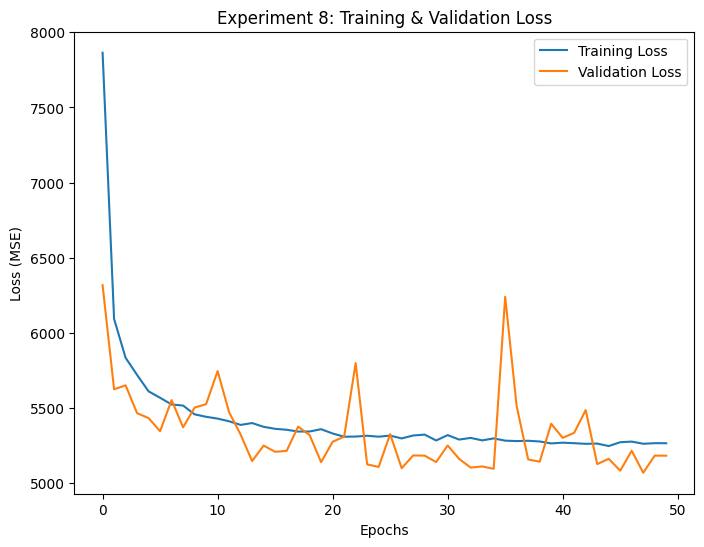

In [38]:
# Plot training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title(f'Experiment {exp_idx}: Training & Validation Loss')
plt.legend()
plt.show()